# Challenge 2 - Decision Tree Binary Classification

In [176]:
#Importing modules:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [177]:
#Reading the files:
df_train = pd.read_csv('C:/Users/Akshay/Documents/GitHub/Challenge2/winequality-training.csv')
df_test = pd.read_csv('C:/Users/Akshay/Documents/GitHub/Challenge2/winequality-testing.csv')
df_solution = pd.read_csv('C:/Users/Akshay/Documents/GitHub/Challenge2/winequality-sample.csv')

In [178]:
df_train.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,8.7,0.23,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,0
1,1,5.0,0.27,0.40,1.2,0.076,42.0,124.0,0.99204,3.32,0.47,10.1,0
2,2,8.0,0.16,0.36,1.5,0.033,14.0,122.0,0.99410,3.20,0.39,10.3,0
3,3,5.8,0.28,0.35,2.3,0.053,36.0,114.0,0.99240,3.28,0.50,10.2,0
4,4,7.1,0.14,0.33,1.0,0.104,20.0,54.0,0.99057,3.19,0.64,11.5,0


In [179]:
df_test.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.4,0.18,0.36,13.1,0.056,72.0,163.0,1.00000,3.42,0.35,9.1
1,1,7.6,0.26,0.36,1.6,0.032,6.0,106.0,0.99300,3.15,0.40,10.4
2,2,7.0,0.27,0.48,6.1,0.042,60.0,184.0,0.99566,3.20,0.50,9.4
3,3,7.0,0.24,0.18,1.3,0.046,9.0,62.0,0.99400,3.38,0.47,10.1
4,4,11.1,0.39,0.54,2.7,0.095,21.0,101.0,1.00010,3.13,0.51,9.5


In [180]:
df_train.isnull().sum()    #Missing Data

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [181]:
df_test.isnull().sum()  #Missing data

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

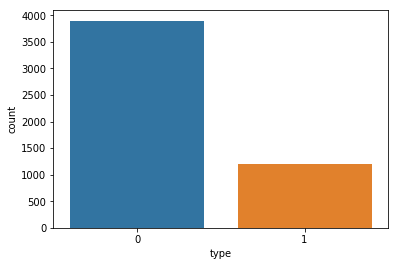

In [182]:
#Number of observations for each class:
sns.countplot(df_train['type'])

In [183]:
#Distribution of data:
class_0 = df_train['type'].value_counts()[0]
class_1 = df_train['type'].value_counts()[1]

print('Number of 0s is {:1.2f} % of the dataset'.format(class_0/len(df_train)*100))
print('Number of 1s is {:1.2f} % of the dataset'.format(class_1/len(df_train)*100))

Number of 0s is 76.48 % of the dataset
Number of 1s is 23.52 % of the dataset


In [184]:
#Splitting training set into X and Y:
X_train = df_train.drop(['Id', 'type'], axis=1)
Y_train = df_train['type']
X_test = df_test.drop('Id', axis=1)

In [185]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8.7,0.23,0.32,13.4,0.044,35.0,169.0,0.99975,3.12,0.47,8.8
1,5.0,0.27,0.40,1.2,0.076,42.0,124.0,0.99204,3.32,0.47,10.1
2,8.0,0.16,0.36,1.5,0.033,14.0,122.0,0.99410,3.20,0.39,10.3
3,5.8,0.28,0.35,2.3,0.053,36.0,114.0,0.99240,3.28,0.50,10.2
4,7.1,0.14,0.33,1.0,0.104,20.0,54.0,0.99057,3.19,0.64,11.5


In [186]:
Y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: type, dtype: int64

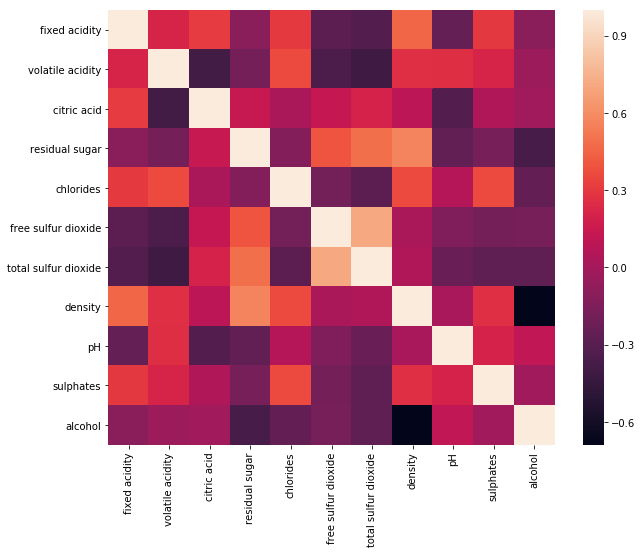

In [187]:
#Correlation plot:
plt.subplots(figsize=(10,8))
corr=X_train.corr()
sns.heatmap(corr)

In [ ]:
# From the above heatmap, we can see that 1. density and alcohol 2. citric acid and volatile acidity are inversely related

In [150]:
#Feature Scaling:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

In [151]:
#Hyperparameter Tuning for Decision trees using GridSearchCV:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameter_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,20,1)), "min_samples_leaf": list(range(5,7,1)), 'min_samples_split' : range(10,500,20)}
grid = GridSearchCV(DecisionTreeClassifier(), parameter_grid, cv=4)
grid.fit(X_train, Y_train)

grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [152]:
#Fitting the best estimator to training data and predicting for the test data:
tree = grid.best_estimator_
tree.fit(X_train, Y_train)
predictions = tree.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [153]:
X_test.shape

(1400, 11)

In [154]:
len(predictions)

1400

In [156]:
#Exporting predictions to file:
df_solution['type'] = predictions
df_solution.to_csv('challenge2solution.csv', index = False)

In [189]:
# Converting array to dataframe column:
columns = ['type']
values = predictions
predictions = pd.DataFrame(values, columns = columns)
predictions.head(10)

,type
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,1
8,0
9,1


In [162]:
predictions['type'].value_counts()[0]

1019

In [163]:
predictions['type'].value_counts()[1]

381